# Delta Method

Code for reproducing all the results in the paper _The Delta-method and influence function in epidemiology: a reproducible tutorial_

### Authors

Rodrigo Zepeda-Tello 1| Michael Schomaker 2,3| Aurelien Belot 4| Camille Maringe 4| Mathew Smith 4| Bernard Rachet 4| Mireille E.Schnitzer 5,6| Miguel Angel Luque Fernandez*4,7,8
Affiliations

  1. Instituto Mexicano del Seguro Social, Mexico.
  2. Institute of Public Health, Medical Decision Making and Health Technology Assessment Department of Public Health, Health Services Research and Health Technology Assessment UMIT - University for Health Sciences, Medical Informatics and Technology, Austria.
  3. Centre for Infectious Disease Epidemiology and Research, University of Cape Town,South Africa.
  4. ICON-group. Non-communicable Disease Epidemiology. London School of Hygiene and Tropical Medicine. London, U.K.
  5. Faculty of Pharmacy and Department of Social and Preventive Medicine, University of Montreal, Montreal, Canada.
  6. Department of Epidemiology, Biostatistics and Occupational Health, McGill University, Montreal, Canada.
  7. Non-communicable Disease and Cancer Epidemiology Group, Instuto Biosanitario de Granada (ibs.GRANADA), Andalusian School of Public Health, University o fGranada, Granada, Spain.
  8. Biomedical Network Research Centers of Epidemiology and Public Health(CIBERESP), Madrid, Spain.

Correspondence* 
Miguel Angel Luque-Fernandez, Email: miguel-angel.luque@lshtm.ac.uk

To use **R** run **rmagic** by executing this command:

In [1]:
%load_ext rpy2.ipython

## BOX ONE

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘mvtnorm’, ‘expm’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.1-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 166421 bytes (162 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

[1] 0.490561 0.526475


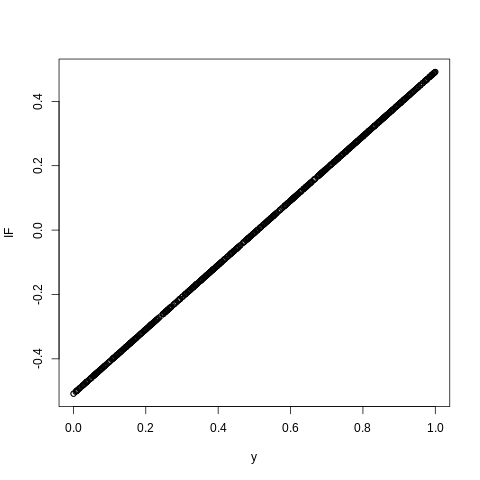

In [3]:
%%R 
##install.packages('msm')
library(msm)
set.seed(7777)
n <- 1000
y <- runif(n, 0, 1)
theoretical_mu <- 0.5 
empirical_mu <- mean(y)

# Functional delta-method: influence curve for the sample mean (first derivative=1(constant))
IF <- 1 * (y - empirical_mu)
mean(IF) #zero by definition

# Plug-in estimation of the sample mean
Yhat <- y + IF # Plug-in estimator
mean(Yhat)

# Geometry of the IF
plot(y, IF)

# Standard Error: Influence Fuction
varYhat.IF <- var(IF) / n # hatvar(hatIF) =1/n sum(yi-bary)^2
seIF <- sqrt(varYhat.IF);seIF
# 0.009161893

# Asymptotic linear inference 95% Confidence Intervals
Yhat_95CI <- c(mean(Yhat) - qnorm(0.975) * sqrt(varYhat.IF), mean(Yhat) + qnorm(0.975) * sqrt(varYhat.IF)); 
mean(Yhat)
## [1] 0.508518
Yhat_95CI
## [1] 0.490561 0.526475





## BOX TWO

In [ ]:
# Data generation
%%R
##install.packages('kdensity')
set.seed(7777)
library(kdensity)
library(EnvStats)
n           <- 1000
y           <- rnorm(n,50)
my_p        <- 0.25 #Change as you see fit

#Compute the first quartile 
empirical_quantile <- quantile(y, my_p); empirical_quantile
f_hat              <- kdensity(y, kernel = "epanechnikov", normalized = F)
plot(f_hat, main = "Estimated density f() of data")

# IF based 95%CI for Y 
var_IF  <- my_p*(1 - my_p)/(f_hat(empirical_quantile)^2)
SEy_IF  <- sqrt(var_IF/n)
CI      <- c(empirical_quantile - qnorm(0.975)*SEy_IF, empirical_quantile + qnorm(0.975)*SEy_IF); CI

# Check results binomial and asymptotically based 95%CI 
eqnpar(x=y, p=my_p, ci=TRUE, ci.method="exact",approx.conf.level=0.95)$interval$limits

eqnpar(x=y, p=my_p, ci=TRUE, ci.method="normal.approx",approx.conf.level=0.95)$interval$limits

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘gss’, ‘stabledist’, ‘Rcpp’, ‘expint’, ‘timeDate’, ‘timeSeries’, ‘fBasics’, ‘fastICA’, ‘extraDistr’, ‘logitnorm’, ‘actuar’, ‘nakagami’, ‘fGarch’, ‘ttutils’, ‘univariateML’, ‘EQL’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gss_2.2-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 544127 bytes (531 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

## BOX THREE

In [ ]:
%%R
# Data generation
install.packages('mvtnorm')
library(mvtnorm)
set.seed(123)
sample  <- data.frame(rmvnorm(1000, c(3,4), matrix(c(1,0.3,0.3,2), ncol = 2)))
colnames(sample) <- c("X","Y")
sample <- data.frame(sample)
 
# SE estimation for the ratio 
attach(sample)
ratio <- X/Y;mean(ratio)
n <- 1000
a <-    (1 / (mean(Y))^2) * var(X) 
b <-   ((mean(X))^2 / (mean(Y))^4) * var(Y) 
c <-    2 * ((mean(X)) / (mean(Y))^3) * cov(X,Y)
var.IF <- 1/n *(a+b-c); var.IF
SE <- sqrt(var.IF); SE
CI = c(mean(ratio)-qnorm(0.975)*SE,mean(ratio)+qnorm(0.975)*SE); mean(ratio); CI

R[write to console]: The following objects are masked from sample (pos = 3):

    X, Y




[1] 0.8827243 0.9240569


## BOX FOUR


In [ ]:
%%R
install.packages("epitools")
library(epitools)
RRtable <- matrix(c(60,40,40,60),nrow = 2, ncol = 2)
RRtable
# The next line asks R to compute the RR and 95% confidence interval
riskratio.wald(RRtable)
# 1.5
p1 <- 0.6
p2 <- 0.4
N1 <- 100
N2 <- 100
ratio <- 0.6 / 0.4; ratio
# 1.5
var.IF <- (1 / (p1)^2 * (p1 * (1 - p1)/ N1)) + (1 / (p2)^2 * (p2 * (1 - p2)/ N2));var.IF
SE <- sqrt(var.IF); SE
# 0.147196
CI = c(log(ratio)-qnorm(.975)*SE,log(ratio)+qnorm(.975)*SE); ratio; exp(CI)
# 1.124081 2.001634

[1] 1.124081 2.001634


## BOX FIVE

In [ ]:
%%R
# Delta-method for the SE of the correlation between two vectors X and Y based on the IF.
install.packages("MASS")

# Generate the data
samples = 1000
R = 0.83
library('MASS')
set.seed(1)
data = mvrnorm(n=samples, mu=c(0, 0), Sigma=matrix(c(1, R, R, 1), nrow=2), empirical=TRUE)
X = data[, 1]  # standard normal (mu=0, sd=1)
Y = data[, 2]  # standard normal (mu=0, sd=1)
# Assess that it works
cor(X, Y)  # r = 0.83

mu1 = mean(X*Y)
mu2 = mean(X)
mu3 = mean(Y)
mu4 = mean(X^2)
mu5 = mean(Y^2) 

IF1 = X*Y-mu1 
IF2 = X-mu2
IF3 = Y-mu3 
IF4 = X^2-mu4 
IF5 = Y^2-mu5

IF = 
    (sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2))^(-1)*IF1+ 
    (-mu3*sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2)+(mu1-mu2*mu3)*mu2*sqrt(mu5-mu3^2)/sqrt(mu4-mu2^2))/((mu4-mu2^2)*(mu5-mu3^2))*IF2+ 
    (-mu2*sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2)+(mu1-mu2*mu3)* mu3*sqrt(mu4-mu2^2)/sqrt(mu5-mu3^2))/((mu4-mu2^2)*(mu5-mu3^2))*IF3+ 
    (-mu1+mu2*mu3)/(2*(mu4-mu2^2)^1.5*(mu5-mu3^2)^.5)*IF4+ 
    (-mu1+mu2*mu3)/(2*(mu4-mu2^2)^.5*(mu5-mu3^2)^1.5)*IF5

SE = sd(IF)/sqrt(1000); SE

rho_hat = (mu1-mu2*mu3)/(sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2)); rho_hat
CI = c(rho_hat-qnorm(0.975)*SE,rho_hat+qnorm(0.975)*SE); CI
## CI [1] 0.8107681 0.8492319

## Checking results:
## Pearson correlation and "normal" confidence intervals.
## install.packages("confintr")
library(confintr)
ci_cor(X,Y)
#Sample estimate: 0.83 
#Confidence interval:
#    2.5%     97.5% 
#    0.8096678 0.8483423 

## Also bootstrap confidence intervals are supported and are the only option for rank correlations. 
# install.packages('boot')
library(boot)
ci_cor(X,Y, method = "pearson", type = "bootstrap", R = 1000, seed = 1)



	Two-sided 95% bootstrap confidence interval for the true Pearson
	correlation coefficient based on 1000 bootstrap replications and the
	bca method

Sample estimate: 0.83 
Confidence interval:
     2.5%     97.5% 
0.8081769 0.8475616 



## BOX SIX


In [ ]:
%%R
# Data generation
set.seed (1972)
N <- 1000
# Age (1: > 65; 0: <= 65)
age <- rbinom(N,1 ,0.6)
# treatment (1: dual; 0=mono)
treat <- rbinom(N,1,plogis (0.35 - 0.15*age))
# Counterfactual outcome under A=1 and A=0 respectively
death.1 <- rbinom(N,1,plogis(2 - 1*1 + 0.65*age))
death.0 <- rbinom(N,1,plogis(2 - 1*0 + 0.65*age))
# Observed outcome: mortality at 1 year after treatment initiation (1: death)
death <- death.1*treat + death.0*(1 - treat)
# One year mortality risk differences
mean(death.1 - death.0)
## -0.13            

[1] -0.13


## BOX SEVEN

In [ ]:

%%R
# Delta method to derive the SE for the conditional RR
data  <- as.data.frame(cbind(death , treat , age))
m <- glm(death ~ age + treat, family = binomial, data = data)
pMono <- predict(m, newdata = data.frame(age = 1, treat = 0), type = "response")
pDual <- predict(m, newdata = data.frame(age = 0, treat = 1), type = "response")
rr <- pMono / pDual
cat("Conditional risk ratio: ", rr)
# Conditional Risk Ratio:  1.330238

# The partial derivative are computed in R as follows:
x1 <- 1
x2 <- 0
x3 <- 0
x4 <- 1
b0 <- coef(m)[1]
b1 <- coef(m)[2]
b2 <- coef(m)[3]
e1 <- exp(- b0 - 1*b1 - 0*b2)
e2 <- exp(- b0 - 0*b1 - 1*b2)
p1 <- 1 / (1 + e1)
p2 <- 1 / (1 + e2)
# check rr 
p1/p2
# 1.330238
dfdb0 <- -e2*p1 + (1 + e2)*p1*(1 - p1)
dfdb1 <- -x2*e2*p1 + (1 + e2)*x1*p1*(1 - p1)
dfdb2 <- -x4*e2*p1 + (1 + e2)*x3*p1*(1 - p1)
grad <- c(dfdb0, dfdb1, dfdb2)
vG <- t(grad) %*% vcov(m) %*% (grad)
se_rr <- c(sqrt(vG))
se_rr
# 0.06057779
# Check with implemented delta-method in library msm 
library(msm)
se_rr_delta <- deltamethod( ~(1 + exp(-x1 -0*x2 -1*x3)) /
                                (1 + exp(-x1 -1*x2 -0*x3)), 
                            c(b0, b1, b2), 
                            vcov(m));se_rr_delta
## 0.06057779
# We obtain the same results for the SE of the RR computed before

# Finally, we compute the type Wald 95% CI
lb <- rr - qnorm(.975) * sqrt(vG)
ub <- rr + qnorm(.975) * sqrt(vG)
# Conditional Risk Ratio (95%CI)
c(lb, ub)
##  1.211508 1.448968

Conditional risk ratio:  1.330238[1] 1.211508 1.448968
